---
# <CENTER><font color="crimson">UNSUPERVISED LEARNING</font><br><small><b><font color="darkgoldenrod">CENTROID-BASED CLUSTERING</font></b></small>
---
<font color="dodgerblue">Prepared by **NICHOLAS DOMINIC**
<br>Guided from *Aurélien Géron*'s **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow** (2nd ed., by O’Reilly Media, Inc.)
<br>Powered by Interactive Python **Jupyter Notebook** (.ipynb), developed with **Python 3.7**

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

## <font color="crimson">User-defined Function

In [2]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c="xkcd:vibrant blue", s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)

In [3]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=30, linewidths=8, color=circle_color, zorder=10, alpha=.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, linewidths=50, color=cross_color, zorder=11, alpha=1, label="Centroid")
    plt.legend(loc='best')

In [4]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - .1
    maxs = X.max(axis=0) + .1
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]) # .ravel for flatten an array, .c_ for concatenation
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2) # plot the dataset
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    plt.title("KMeans with k={}".format(clusterer.n_clusters))
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)

## <font color="crimson">K-Means Clustering</font>
Documentation of [K-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

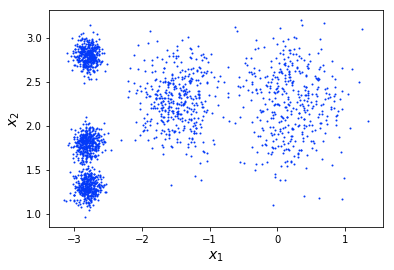

In [5]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([.4, .3, .1, .1, .1])
x, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)
plot_clusters(x)

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(x)

In [7]:
# Centroid position for each cluster
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [8]:
# Sum of squared distances of samples to their closest cluster center (centroid)
kmeans.inertia_

211.5985372581684

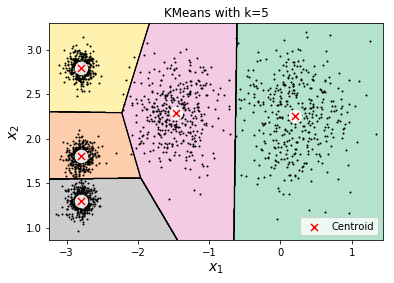

In [9]:
plot_decision_boundaries(kmeans, x)